## Км-4
1. Средствами SymPy решить систему дифференциальных уравнений
$\frac{{d^2}x(t)}{dt^2} = x(t) + y(t)$ , $\frac{{d^2}y(t)}{dt^2} = x(t) - y(t)$ на отрезке 𝑡 ∈ [0,1] и при условиях: 𝑥(0) = 1, 𝑥′(0) = 1, 𝑦(1) = 1, 𝑦′(1) = 0
Постройте графики 𝑥(𝑡), 𝑦(𝑡).

2. На занятии мы анализировали открытые данные по эпидемии Covid-19. Загрузите актуальные данные worldometer в DataFrame. Упорядочите данные по числу заболеваний на миллион жителей. Постройте графики накопленных сумм для этого показателя, числа тестов на миллион жителей, числа смертей на миллион жителей.

### Задание 1

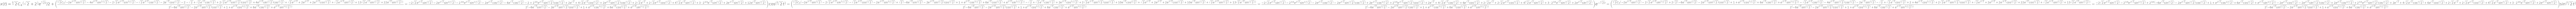

In [75]:
from sympy import init_printing, Function, dsolve, symbols, var, lambdify, Eq
import numpy as np
init_printing()


t = symbols('t')
var('C1 C2 C3 C4')
x = Function('x')
y = Function('y')

eq1 = Eq(x(t).diff('t', 2), x(t) + y(t))
eq2 = Eq(y(t).diff('t', 2), x(t) - y(t))

ics = {x(0): 1, x(t).diff(t).subs(t, 0): 1, y(1): 1, y(t).diff(t).subs(t, 1): 0}
sol = dsolve([eq1, eq2], [x(t), y(t)], ics=ics)
sol[0]

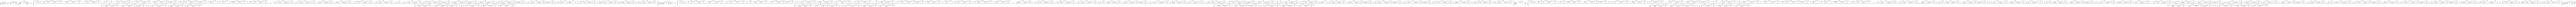

In [76]:
sol[1]

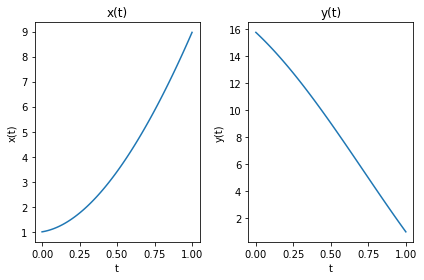

In [77]:
import matplotlib.pyplot as plt


def draw_root(x, y, a=0, b=1, n=100):
    tt = np.linspace(a, b, n)
    xx = lambdify(t, x.rhs, 'numpy')(tt)
    yy = lambdify(t, y.rhs, 'numpy')(tt)
    fig, ax = plt.subplots(1, 2)
    ax[0].plot(tt, xx), ax[0].set_title('x(t)')
    ax[0].set_xlabel('t'), ax[0].set_ylabel('x(t)')
    ax[1].plot(tt, yy), ax[1].set_title('y(t)')
    ax[1].set_xlabel('t'), ax[1].set_ylabel('y(t)')
    plt.tight_layout()
    plt.show()

X, Y = sol[0].subs({'C4': 1}), sol[1].subs({'C4': 1})
draw_root(X, Y)

### Задание 2

In [72]:
import covid
import pandas as pd
import matplotlib.pyplot as plt


covid_world = covid.Covid(source='worldometers').get_data()
df = pd.DataFrame(covid_world).sort_values(by='total_cases_per_million', ascending=False)
df = df.loc[df['population'] != 0]
df.total_tests = list(map(int, df.total_tests / (df.population / 10**6)))
df = df[['total_cases_per_million', 'total_tests', 'total_deaths_per_million']]
df_s = df.cumsum()
df_s

,total_cases_per_million,total_tests,total_deaths_per_million
161,385876,3225589,1833
110,710215,4929682,5771
185,1031898,18902837,8740
157,1345124,18902837,10110
186,1649169,22267191,13136
...,...,...,...
225,18296079,318365520,215445
223,18296095,318365520,215447
227,18296110,318365520,215447
229,18296119,318365520,215447


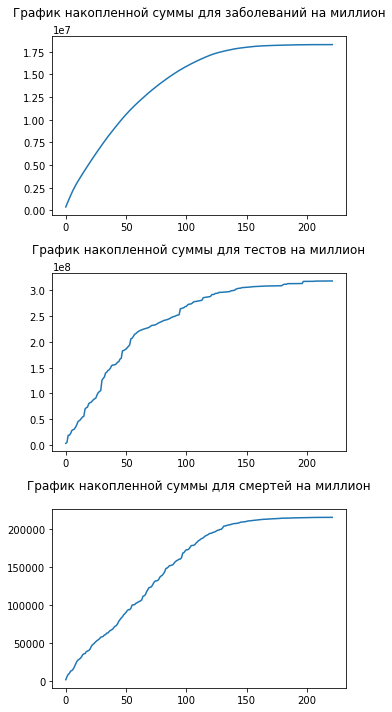

In [73]:
fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.set_title('График накопленной суммы для заболеваний на миллион', pad=20)
ax2.set_title('График накопленной суммы для тестов на миллион', pad=20)
ax3.set_title('График накопленной суммы для смертей на миллион', pad=20)
ax1.plot(range(len(df_s)), df_s.total_cases_per_million)
ax2.plot(range(len(df_s)), df_s.total_tests)
ax3.plot(range(len(df_s)), df_s.total_deaths_per_million)
plt.tight_layout()
plt.show()